In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data Collection
import pandas_datareader as pdr


In [3]:
key='50f302337095406c90cb13892a2e230947a75e38'

In [4]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-06-02 00:00:00+00:00,97.72,97.84,96.63,97.60,40191600,22.818934,22.846956,22.564404,22.790913,160766400,0.0,1.0
1,AAPL,2016-06-03 00:00:00+00:00,97.92,98.27,97.45,97.79,28504888,22.865637,22.947367,22.755885,22.835280,114019552,0.0,1.0
2,AAPL,2016-06-06 00:00:00+00:00,98.63,101.89,97.55,97.99,23292504,23.031431,23.792685,22.779237,22.881983,93170016,0.0,1.0
3,AAPL,2016-06-07 00:00:00+00:00,99.03,99.87,98.96,99.25,22409450,23.124837,23.320988,23.108491,23.176210,89637800,0.0,1.0
4,AAPL,2016-06-08 00:00:00+00:00,98.94,99.56,98.68,99.02,20848131,23.103821,23.248599,23.043107,23.122502,83392524,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-05-24 00:00:00+00:00,127.10,127.94,125.94,126.010,63092945,127.10,127.94,125.94,126.010,63092945,0.0,1.0
1253,AAPL,2021-05-25 00:00:00+00:00,126.90,128.32,126.32,127.820,72009482,126.90,128.32,126.32,127.820,72009482,0.0,1.0
1254,AAPL,2021-05-26 00:00:00+00:00,126.85,127.39,126.42,126.955,56575920,126.85,127.39,126.42,126.955,56575920,0.0,1.0
1255,AAPL,2021-05-27 00:00:00+00:00,125.28,127.64,125.08,126.440,94625601,125.28,127.64,125.08,126.440,94625601,0.0,1.0
1256,AAPL,2021-05-28 00:00:00+00:00,124.61,125.80,124.55,125.570,71311109,124.61,125.80,124.55,125.570,71311109,0.0,1.0


In [10]:
df2=df.reset_index()['close']

In [11]:
df2.head()

0    97.72
1    97.92
2    98.63
3    99.03
4    98.94
Name: close, dtype: float64

In [12]:
df2[1228:]

1228    133.11
1229    133.50
1230    131.94
1231    134.32
1232    134.72
1233    134.39
1234    133.58
1235    133.48
1236    131.46
1237    132.54
1238    127.85
1239    128.10
1240    129.74
1241    130.21
1242    126.85
1243    125.91
1244    122.77
1245    124.97
1246    127.45
1247    126.27
1248    124.85
1249    124.69
1250    127.31
1251    125.43
1252    127.10
1253    126.90
1254    126.85
1255    125.28
1256    124.61
Name: close, dtype: float64

In [13]:
df2.shape

(1257,)

In [14]:
df2

0        97.72
1        97.92
2        98.63
3        99.03
4        98.94
         ...  
1252    127.10
1253    126.90
1254    126.85
1255    125.28
1256    124.61
Name: close, Length: 1257, dtype: float64

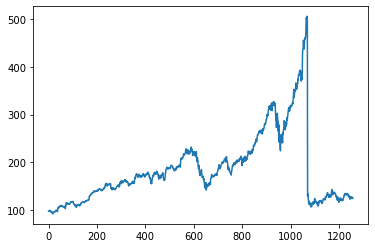

In [15]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [16]:
##LSTM Are sensitive to the scaling of data so we use minMaxScaler

In [17]:
import numpy as np

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [19]:
df2.shape

(1257, 1)

In [20]:
#Spliting the data into train and test
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [21]:
train_data.shape

(817, 1)

In [22]:
test_data.shape

(440, 1)

In [23]:
# Data preprocessing converting train_data to labels
import numpy
#Convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i: (i+time_step),0] ###i=0 ,0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)
        


In [24]:
time_step=100
X_train,Y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data, time_step)

In [25]:
print(X_train)

[[0.01371815 0.01420118 0.01591595 ... 0.06057239 0.06042748 0.05931651]
 [0.01420118 0.01591595 0.01688202 ... 0.06042748 0.05931651 0.06185243]
 [0.01591595 0.01688202 0.01666465 ... 0.05931651 0.06185243 0.06330153]
 ...
 [0.24951093 0.25033209 0.25349595 ... 0.29126917 0.29083444 0.2671175 ]
 [0.25033209 0.25349595 0.26098297 ... 0.29083444 0.2671175  0.27641589]
 [0.25349595 0.26098297 0.25953387 ... 0.2671175  0.27641589 0.27078855]]


In [26]:
print(X_test.shape)

(339, 100)


In [27]:
print(ytest.shape)

(339,)


In [28]:
print(X_train.shape)

(716, 100)


In [29]:
print(Y_train.shape)

(716,)


In [30]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
#reshape input to be [samples,time steps,features] which is required for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,Y_train,validation_data=(X_test,ytest),epochs=100,verbose=1)

Epoch 1/100
23/23 [==============================] - 6s 253ms/step - loss: 0.0077 - val_loss: 0.0301
Epoch 2/100
23/23 [==============================] - 4s 160ms/step - loss: 0.0013 - val_loss: 0.0234
Epoch 3/100
23/23 [==============================] - 4s 162ms/step - loss: 5.2112e-04 - val_loss: 0.0209
Epoch 4/100
23/23 [==============================] - 4s 164ms/step - loss: 4.5398e-04 - val_loss: 0.0196
Epoch 5/100
23/23 [==============================] - 4s 162ms/step - loss: 4.4066e-04 - val_loss: 0.0191
Epoch 6/100
23/23 [==============================] - 4s 159ms/step - loss: 4.0058e-04 - val_loss: 0.0175
Epoch 7/100
23/23 [==============================] - 4s 161ms/step - loss: 3.7503e-04 - val_loss: 0.0165
Epoch 8/100
23/23 [==============================] - 4s 161ms/step - loss: 3.2383e-04 - val_loss: 0.0157
Epoch 9/100
23/23 [==============================] - 4s 160ms/step - loss: 2.9881e-04 - val_loss: 0.0154
Epoch 10/100
23/23 [==============================] - 4s 161ms/

23/23 [==============================] - 4s 155ms/step - loss: 1.0221e-04 - val_loss: 0.0041
Epoch 79/100
23/23 [==============================] - 4s 156ms/step - loss: 9.3876e-05 - val_loss: 0.0039
Epoch 80/100
23/23 [==============================] - 4s 160ms/step - loss: 9.0319e-05 - val_loss: 0.0039
Epoch 81/100
23/23 [==============================] - 4s 157ms/step - loss: 9.7869e-05 - val_loss: 0.0041
Epoch 82/100
23/23 [==============================] - 4s 157ms/step - loss: 1.1827e-04 - val_loss: 0.0038
Epoch 83/100
23/23 [==============================] - 4s 158ms/step - loss: 8.9883e-05 - val_loss: 0.0038
Epoch 84/100
23/23 [==============================] - 4s 160ms/step - loss: 1.0277e-04 - val_loss: 0.0042
Epoch 85/100
23/23 [==============================] - 4s 158ms/step - loss: 9.6934e-05 - val_loss: 0.0038
Epoch 86/100
23/23 [==============================] - 4s 160ms/step - loss: 8.5728e-05 - val_loss: 0.0040
Epoch 87/100
23/23 [==============================] - 4s 16

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.3.0'

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:
#Transformation to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
#Calculation of RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

244.14587286483845

In [42]:
math.sqrt(mean_squared_error(Y_train,train_predict))

172.08337451306863

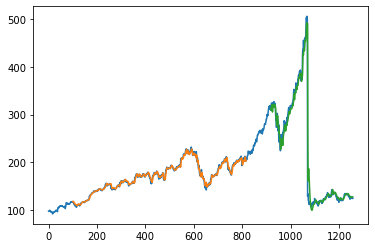

In [47]:
###Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#Shift  test prediction for plotting
testPredictPlot=numpy.empty_like(df2)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
